# Logistic Regression

## Introduction
This project aims to predict the risk of coronary heart disease using logistic regression. Covers EDA, Modelling and Tuning.

Data is take from [Kaggle](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

_____
## Environment Setup
**Import Libraries**

In [1]:
# data array, analysis, and visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data split for training and testing, LogRegess algorithm, and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

**Load Dataset**

In [2]:
# load dataset to 'abalone'
heart = pd.read_csv('framingham.csv')

_____
## EDA
### **Data Description**

**Preview a portion of the dataset**

In [3]:
# print first 10 records of 'heart'
heart.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Data contains the following columns:  
- **Sex** - male or female
- **Age** - Age of the patient
- **Current Smoker** - whether or not the patient is a current smoker
- **Cigs Per Day** - the number of cigarettes that the person smoked on average in one day
- **BP Meds** - whether or not the patient was on blood pressure medication
- **Prevalent Stroke** - whether or not the patient had previously had a stroke
- **Prevalent Hyp** - whether or not the patient was hypertensive
- **Diabetes** - whether or not the patient had diabetes
- **Tot Chol** - total cholesterol level
- **Sys BP** - systolic blood pressure
- **Dia BP** - diastolic blood pressure
- **BMI** - Body Mass Index
- **Heart Rate** - heart rate
- **Glucose** - glucose level
- **TenYearCHD** - 10 year risk of coronary heart disease (1 = Yes, 0 = No)

**Dataset information**

In [4]:
# print data information
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


**Count for any duplicated rows**

In [5]:
# sums duplicated rows
heart.duplicated().sum()

0

**Heatmap for missing values**

<AxesSubplot:>

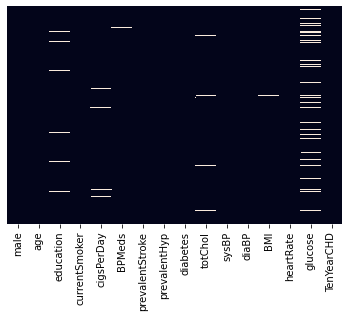

In [6]:
# heatmap on missing values, no color bar, no y-axis labels
sns.heatmap(heart.isnull(), cbar=False, yticklabels=False)

**Data Understanding Summary:**  
- 4238 unique rows.
- Missing values are present.
- All columns are numeric datatypes, hence no datatype transformation needed.
- Multicollinearity for **currentSmoker** and **cigsPerDay**; any value greater than 0 for **cigsPerDay** will have a '1' value for **currentSmoker**.

### **Data Visualisation**

**Gender**

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

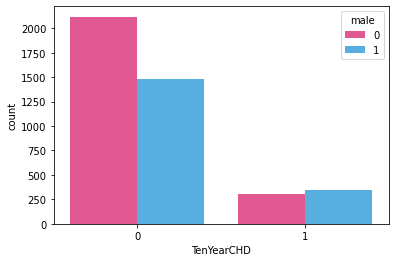

In [7]:
# plot countplot, split by gender, custom palette for clarity
sns.countplot(x='TenYearCHD', data=heart, hue='male', palette=['#f5428d',"#42b6f5"])

- Individuals with coronary heart disease risk tends to be Male.

**Age and Gender**

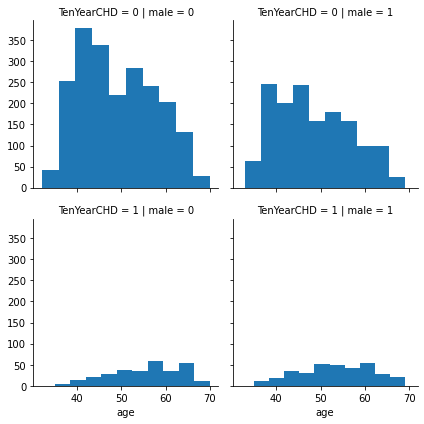

In [8]:
# plot facet grid to show dist of age by TenYearCHD and Gender
g = sns.FacetGrid(heart, col='male', row = 'TenYearCHD')
g = g.map(plt.hist, 'age')

- Younger individuals tends to not have CHD for both genders. CHD occurs at a younger age for males, compared to females.

**Smoker and Number of Cigarettes**

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

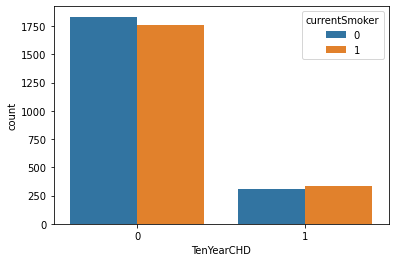

In [9]:
# plot countplot for TenYearCHD, split by smoker
sns.countplot(x='TenYearCHD', hue='currentSmoker', data=heart)

<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

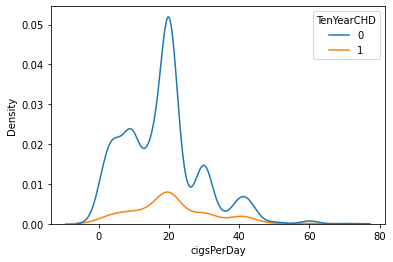

In [10]:
# plot densityplot, cigsPerDay>0, split by TenYearCHD
sns.kdeplot(x=heart[heart['cigsPerDay']>0]['cigsPerDay'], data=heart, hue='TenYearCHD')

- Smokers are more likely to be at risk of CHD.
- Individuals not at risk of CHD tends to smoke lesser (<20).

**Blood Pressure Meds, Prevalent Stroke and Hypertensive, and Diabetic**

Text(0.5, 1.0, 'Diabetic')

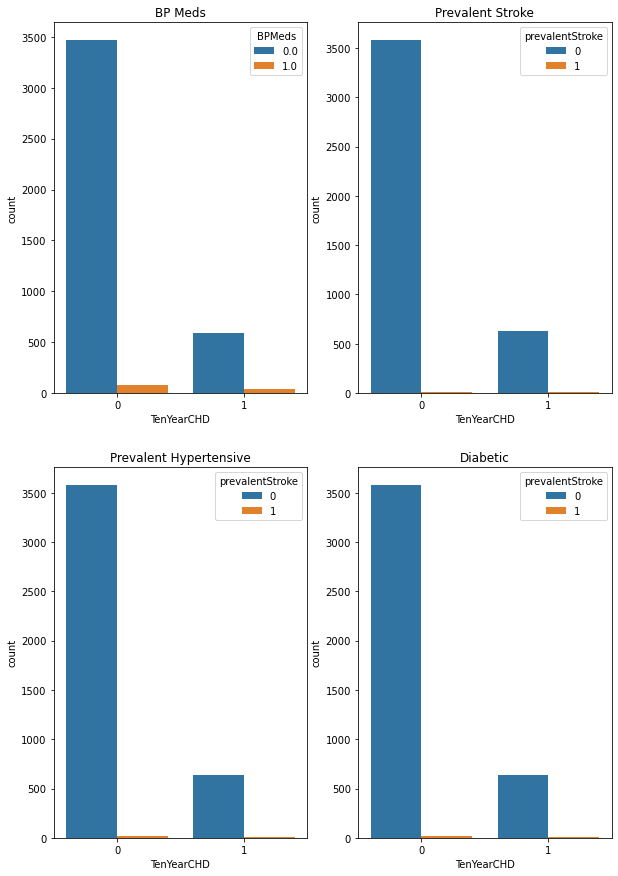

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10,15))

sns.countplot(ax=axes[0,0], x='TenYearCHD', data=heart, hue='BPMeds')
axes[0,0].set_title('BP Meds')

sns.countplot(ax=axes[0,1], x='TenYearCHD', data=heart, hue='prevalentStroke')
axes[0,1].set_title('Prevalent Stroke')

sns.countplot(ax=axes[1,0], x='TenYearCHD', data=heart, hue='prevalentStroke')
axes[1,0].set_title('Prevalent Hypertensive')

sns.countplot(ax=axes[1,1], x='TenYearCHD', data=heart, hue='prevalentStroke')
axes[1,1].set_title('Diabetic')

- No strong visual difference for CHD individuals who were taking blood pressure meds, had prevalent stroke or hypertension, or were diabetic.

<AxesSubplot:xlabel='TenYearCHD', ylabel='BMI'>

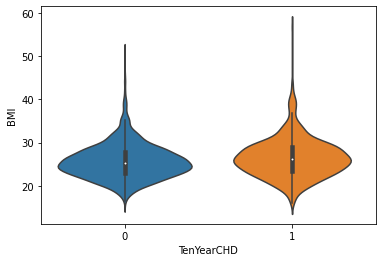

In [12]:
sns.violinplot(x='TenYearCHD', y='BMI', data=heart)

- BMI of CHD individuals are higher, with some values extending further than the maximum BMI value of non-CHD individuals.

_____
## Data Cleaning

- We will create a new column that bins the age of individuals into age groups. We can then use **education**, **totChol**, and **glucose** median age group values to fill missing values for their respective columns.
- Missing **cigsPerDay** values will be filled using median value if they smoke.
- Rest are dropped.

**Bin Age Groups**

In [13]:
# statistical summary - used to find min and max values
heart.describe()['age']

count    4238.000000
mean       49.584946
std         8.572160
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

In [14]:
# list of conditions 
classifyage = [(heart['age']>60),
           (heart['age']>50),
           (heart['age']>40),
           (heart['age']>30)]

# assigned values
agebinvalues = ['61-70', '51-60', '41-50', '31-40']
     
# new column 'age bin'
heart['age bin'] = np.select(classifyage, agebinvalues)

In [15]:
# show median values for selected columns
heart.groupby('age bin').median()[['education', 'totChol', 'glucose']]

,education,totChol,glucose
age bin,,,
31-40,2.0,210.0,77.0
41-50,2.0,230.0,77.0
51-60,2.0,245.0,79.0
61-70,1.0,245.0,80.0


**Fill education, totChol, and glucose median age group values**

In [16]:
# function to fill NA values for education
def fill_edu(cols):
    education = cols[0]
    agebin = cols[1]

    if pd.isnull(education):
        
        if agebin == '61-70':
            return 1.0
        else:
            return 2.0
    else:
        return education


# function to NA values for totChol
def fill_totChol(cols):
    totChol = cols[0]
    agebin = cols[1]

    if pd.isnull(totChol):
        
        if agebin == '31-40':
            return 210.0
        elif agebin == '41-50':
            return 230.0
        else:
            return 245.0
    else:
        return totChol

    
# function to NA values for glucose
def fill_glucose(cols):
    glucose = cols[0]
    agebin = cols[1]

    if pd.isnull(glucose):
        
        if agebin == '51-60':
            return 79.0
        elif agebin == '61-70':
            return 80.0
        else:
            return 77
    else:
        return glucose

In [17]:
# apply functions
heart['education'] = heart[['education', 'age bin']].apply(fill_edu, axis=1)
heart['totChol'] = heart[['totChol', 'age bin']].apply(fill_totChol, axis=1)
heart['glucose'] = heart[['glucose', 'age bin']].apply(fill_glucose, axis=1)

**Fill cigsPerDay based on current smoker**

In [18]:
# fill cigsPerDay based on median value if currentSmoker=1
def fill_cigs(cols):
    smoker = cols[0]
    cigs = cols[1]

    if pd.isnull(cigs):
        
        if smoker == 0:
            return 0
        else:
            return 20
    else:
        return cigs

# apply function
heart['cigsPerDay'] = heart[['currentSmoker', 'cigsPerDay']].apply(fill_cigs, axis=1)

**Drop remaining NA rows**

<AxesSubplot:>

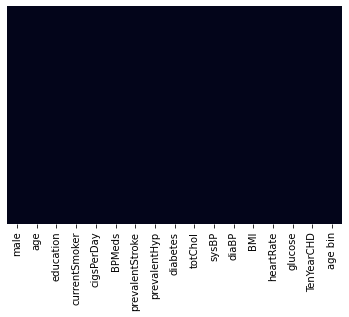

In [19]:
# drop any NA rows
heart.dropna(inplace=True)

# heatmap on missing value
sns.heatmap(heart.isnull(), cbar=False, yticklabels=False)

**Drop columns**

In [20]:
# drop currentSmoker column (multicollinearity with cigsPerDay)
heart.drop(columns='currentSmoker', inplace=True)

# drop age bin column (multicollinearity with age bin)
heart.drop(columns='age bin', inplace=True)

_____
## Modelling

**Train Test Split**

In [21]:
# set predictor(X) and response(y) arrays
X = heart[['male', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']]

y = heart['TenYearCHD']


# split data - 70% train, 30% test with seed 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

**Train Model**

In [22]:
# create model, set max interation to 10,000
logmodel = LogisticRegression(max_iter=10000)

# train model
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

**Evaluate Performance**

In [23]:
# test model
predictions = logmodel.predict(X_test)

# print score summary
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1079
           1       0.67      0.08      0.15       171

    accuracy                           0.87      1250
   macro avg       0.77      0.54      0.54      1250
weighted avg       0.84      0.87      0.82      1250



In [24]:
confusion_matrix(y_test, predictions)

array([[1072,    7],
       [ 157,   14]], dtype=int64)

Taking **TenYearCHD** '1' as positive value:  

- True Positive: 14 - Model correctly predicted 14 individuals with CHD.
- True Negative: 1072 - Model correctly predicted 1072 individuals without CHD.
- False Positive: 7 - Model incorrectly predicted 7 non-CHD individuals to have CHD.
- False Negative: 157 - Model incorrectly predicted 157 CHD individuals to not have CHD.


- Precision: 67% of the predicted CHD individuals were at risk of CHD.
- Recall: 8% of CHD individuals were correctly predicted by the model.

Overall, the model did poorly to predict CHD individuals but did great to predict non-CHD individuals. 

_____
## Tuning
**Improving Model**
- Perform normalisation to prevent attributes of larger value from significantly influencing the outcome.
- Stratified sampling based on **TenYearCHD** for train-test split to ensure both classes are represented equally in the training data due to significant inequality in the distribution of **TenYearCHD** binary. 

**Normalisation**

In [25]:
# perform z-score normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=['male', 'age', 'education', 
       'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])

# revert normalised male column
X_scaled['male'] = X['male']

**Stratified Sampling Train-test Split**

In [26]:
# split data - 70% train, 30% test with seed 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345, stratify=y)

In [27]:
# count unique values
y_train.value_counts()

0    2480
1     435
Name: TenYearCHD, dtype: int64

In [28]:
y_test.value_counts()

0    1063
1     187
Name: TenYearCHD, dtype: int64

- Both train and test data now have an equal distribution of **TenYearCHD**.

**Modelling**

In [29]:
# create model, set max interation to 10,000
logmodel = LogisticRegression(max_iter=10000)

# train model
logmodel.fit(X_train, y_train)

# test model
predictions = logmodel.predict(X_test)

**Evaluate New Performance**

In [30]:
# print score summary
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1063
           1       0.77      0.09      0.16       187

    accuracy                           0.86      1250
   macro avg       0.82      0.54      0.54      1250
weighted avg       0.85      0.86      0.81      1250



In [31]:
confusion_matrix(y_test, predictions)

array([[1058,    5],
       [ 170,   17]], dtype=int64)

Taking **TenYearCHD** '1' as positive value:  

- True Positive: 17 - Model correctly predicted 17 individuals with CHD. (21% increase, good)
- True Negative: 1058 - Model correctly predicted 1058 individuals without CHD. (1.3% decrease, bad)
- False Positive: 5 - Model incorrectly predicted 5 non-CHD individuals to have CHD. (28% decrease, good)
- False Negative: 170 - Model incorrectly predicted 170 CHD individuals to not have CHD. (8.3% increase, bad)


- Precision: 77% of the predicted CHD individuals were at risk of CHD. (15% increase, good)
- Recall: 9% of CHD individuals were correctly predicted by the model. (13% increase, good)



New model was able to identify more CHD individuals correctly at the expense of identifying more CHD individuals to not have CHD. Latter means more individuals will fly under the radar of not being detected for CHD. 